# Stock Market Predictor

In [19]:
import yfinance as yf
import pandas as pd

### 1.) Downloading S&P 500 stock data

In [4]:
sp500 = yf.Ticker("^GSPC")

#query all data from when index was created
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2024-01-19,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,0,0
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,0,0
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0,0


In [6]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25'],
              dtype='datetime64[ns]', name='Date', length=18636, freq=None)

### 2.) Cleaning and visualizing stock market data

<AxesSubplot:xlabel='Date'>

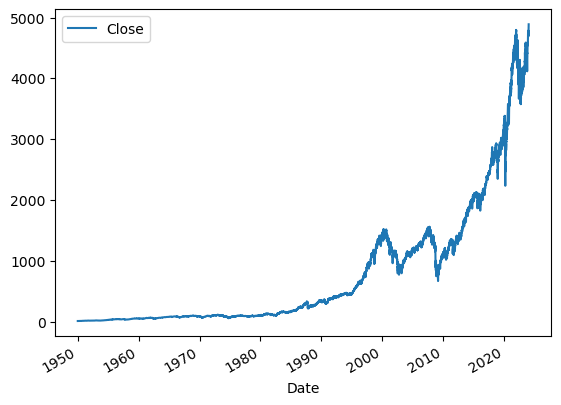

In [7]:
sp500.plot.line(y='Close', use_index=True)

In [8]:
# remove unused columns
del sp500["Dividends"]
del sp500["Stock Splits"]

### 3.) Establish target for ML Model

In [10]:

sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2024-01-19,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805


In [12]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2024-01-19,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1


In [16]:
#Remove data before 1990
sp500 = sp500.loc["1990-01-01":].copy()     # avoiding copy warning when subsetting df

### 4.) Training initial model

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Split data into train and test set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train ["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])
predictions

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
predictions = pd.Series(predictions, index=test.index)
predictions

Date
2023-09-01    0
2023-09-05    1
2023-09-06    1
2023-09-07    1
2023-09-08    0
             ..
2024-01-19    0
2024-01-22    0
2024-01-23    0
2024-01-24    0
2024-01-25    0
Length: 100, dtype: int64

### Initial Precision Score

In [25]:
precision_score(test["Target"], predictions)

0.54

In [27]:
combined = pd.concat([test["Target"], predictions], axis=1)

<AxesSubplot:xlabel='Date'>

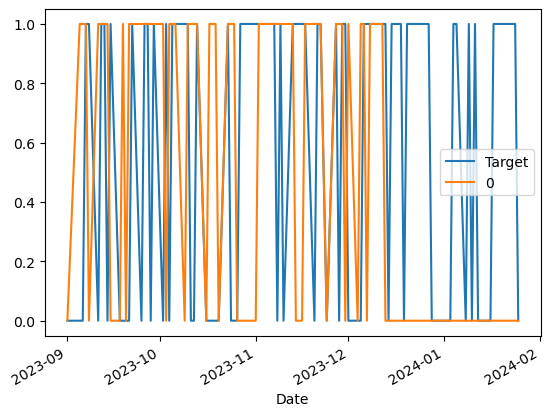

In [28]:
combined.plot()

### Building a Backtesting System

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], predictions], axis=1)
    return combined

In [32]:
#train model with 10 years of data then predict one year at a time
# There are approximately 250 trading days 
def backtest(data, model, predictors, start=2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(sp500, model, predictors)

In [34]:
predictions["Predictions"].value_counts()

0    3486
1    2596
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [37]:
#look at number of days market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534693
0    0.465307
Name: Target, dtype: float64

### Add additional predictors to model

In [38]:
#horizons on which we want to look at rolling means 
horizons = [2, 5, 60, 250, 1000] # 2 days, trading week, 3 months, year, 4 years 
new_predictors = [] 

for horizon in horizons:
    rolling_avg = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    #ratio between today's close & avg of past 2 days, today's close & avg of past 5 days etc...
    sp500[ratio_column] = sp500["Close"] / rolling_avg["Close"]
    
    #no. of days in past x days that stock price actually went up
    trend_column = f"Trend_{horizon}"
    #sums target
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]


In [39]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1,1.006119,2.0,1.012099,3.0,1.058888,39.0,1.118437,136.0,1.212935,528.0
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1,1.001096,2.0,1.011502,3.0,1.058885,39.0,1.120031,136.0,1.215119,528.0
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1,1.001459,2.0,1.010302,4.0,1.059365,40.0,1.122424,137.0,1.218169,529.0


In [41]:
#drop all rows with NaN values
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,4760.100098,4785.790039,4740.569824,4780.939941,4019000000,4839.810059,1,1.004383,1.0,1.002285,2.0,1.048389,38.0,1.105719,136.0,1.198652,527.0
2024-01-19,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1,1.006119,2.0,1.012099,3.0,1.058888,39.0,1.118437,136.0,1.212935,528.0
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1,1.001096,2.0,1.011502,3.0,1.058885,39.0,1.120031,136.0,1.215119,528.0


## Improving the model

In [47]:
model = RandomForestClassifier(n_estimators = 500, min_samples_split = 50, random_state= 1)

In [48]:
def predict(train, test, predictors, model):
    '''adding control over how we define what becomes 1 or 0'''
    model.fit(train[predictors], train["Target"])
    predictions = model.predict_proba(test[predictors])[:,1] #return probability stock market will go up
    # model must be more confident in its prediction before it predicts market will increase
    predictions[predictions >= 0.6] = 1
    predictions[predictions < 0.6] = 0
    predictions = pd.Series(predictions, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], predictions], axis=1)
    return combined

In [49]:
predictions = backtest(sp500, model, new_predictors)

In [44]:
predictions["Predictions"].value_counts()

0.0    4385
1.0     696
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5689655172413793

## Going forward:
- Include indices & markets that open before S&P500
- News sentiment analysis
- Performance of key sectors & stocks in S&P500
